In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [ ]:
df = pd.read_csv("titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


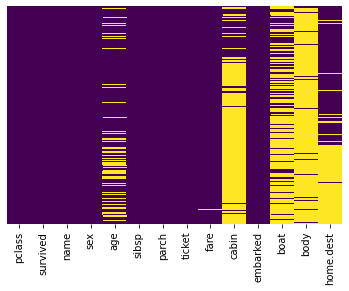

In [ ]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap='viridis')

In [ ]:
# for oct4: How do we know these ages? a Boxplot will tell us?
# 
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else: 
      return 24
  else:
    return Age

In [ ]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

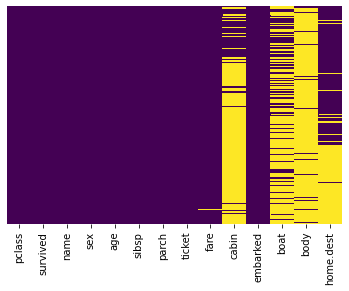

In [ ]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap='viridis')

In [ ]:
df.drop('cabin', axis =1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [ ]:
pd.get_dummies(df['sex'])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [ ]:
sex = pd.get_dummies(df['sex'], drop_first = True)
embark = pd.get_dummies(df['embarked'], drop_first = True)

In [ ]:
df.drop(['sex', 'embarked', 'name', 'ticket'], axis = 1, inplace = True)
df.drop(['fare', 'boat','body',    'home.dest'], axis=1,inplace=True)

In [ ]:
df = pd.concat([df, sex, embark], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived', axis = 1), df['survived'], test_size = 30, random_state = 101)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   male      1309 non-null   uint8  
 6   Q         1309 non-null   uint8  
 7   S         1309 non-null   uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 55.1 KB


In [ ]:
from sklearn.linear_model import LogisticRegression
logModel= LogisticRegression()
logModel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
df.dropna(inplace=True)